In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler


In [69]:
df = pd.read_csv('Data/data.csv')

In [66]:
# حذف outliers
rent_items = df['deal_type'] == 'rent'
Q3_credit_per_m2 = df.loc[rent_items , 'credit_per_m2'].quantile(0.98)
df = df[~(rent_items & (df['credit_per_m2'] > Q3_credit_per_m2))].copy()

# حذف outliers
sell_items = df['deal_type'] == 'sell'
Q3_price_per_m2 = df.loc[sell_items , 'price_per_m2'].quantile(0.98)
df = df[~(sell_items & (df['price_per_m2'] > Q3_price_per_m2))].copy()

features = ['rooms_count','utm_easting', 'utm_northing' ,'city_type' ,'building_size', 'price_value' , 'credit_value', 'created_year_jalali' , 'construction_year','building_age','credit_per_m2','price_per_m2']

X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


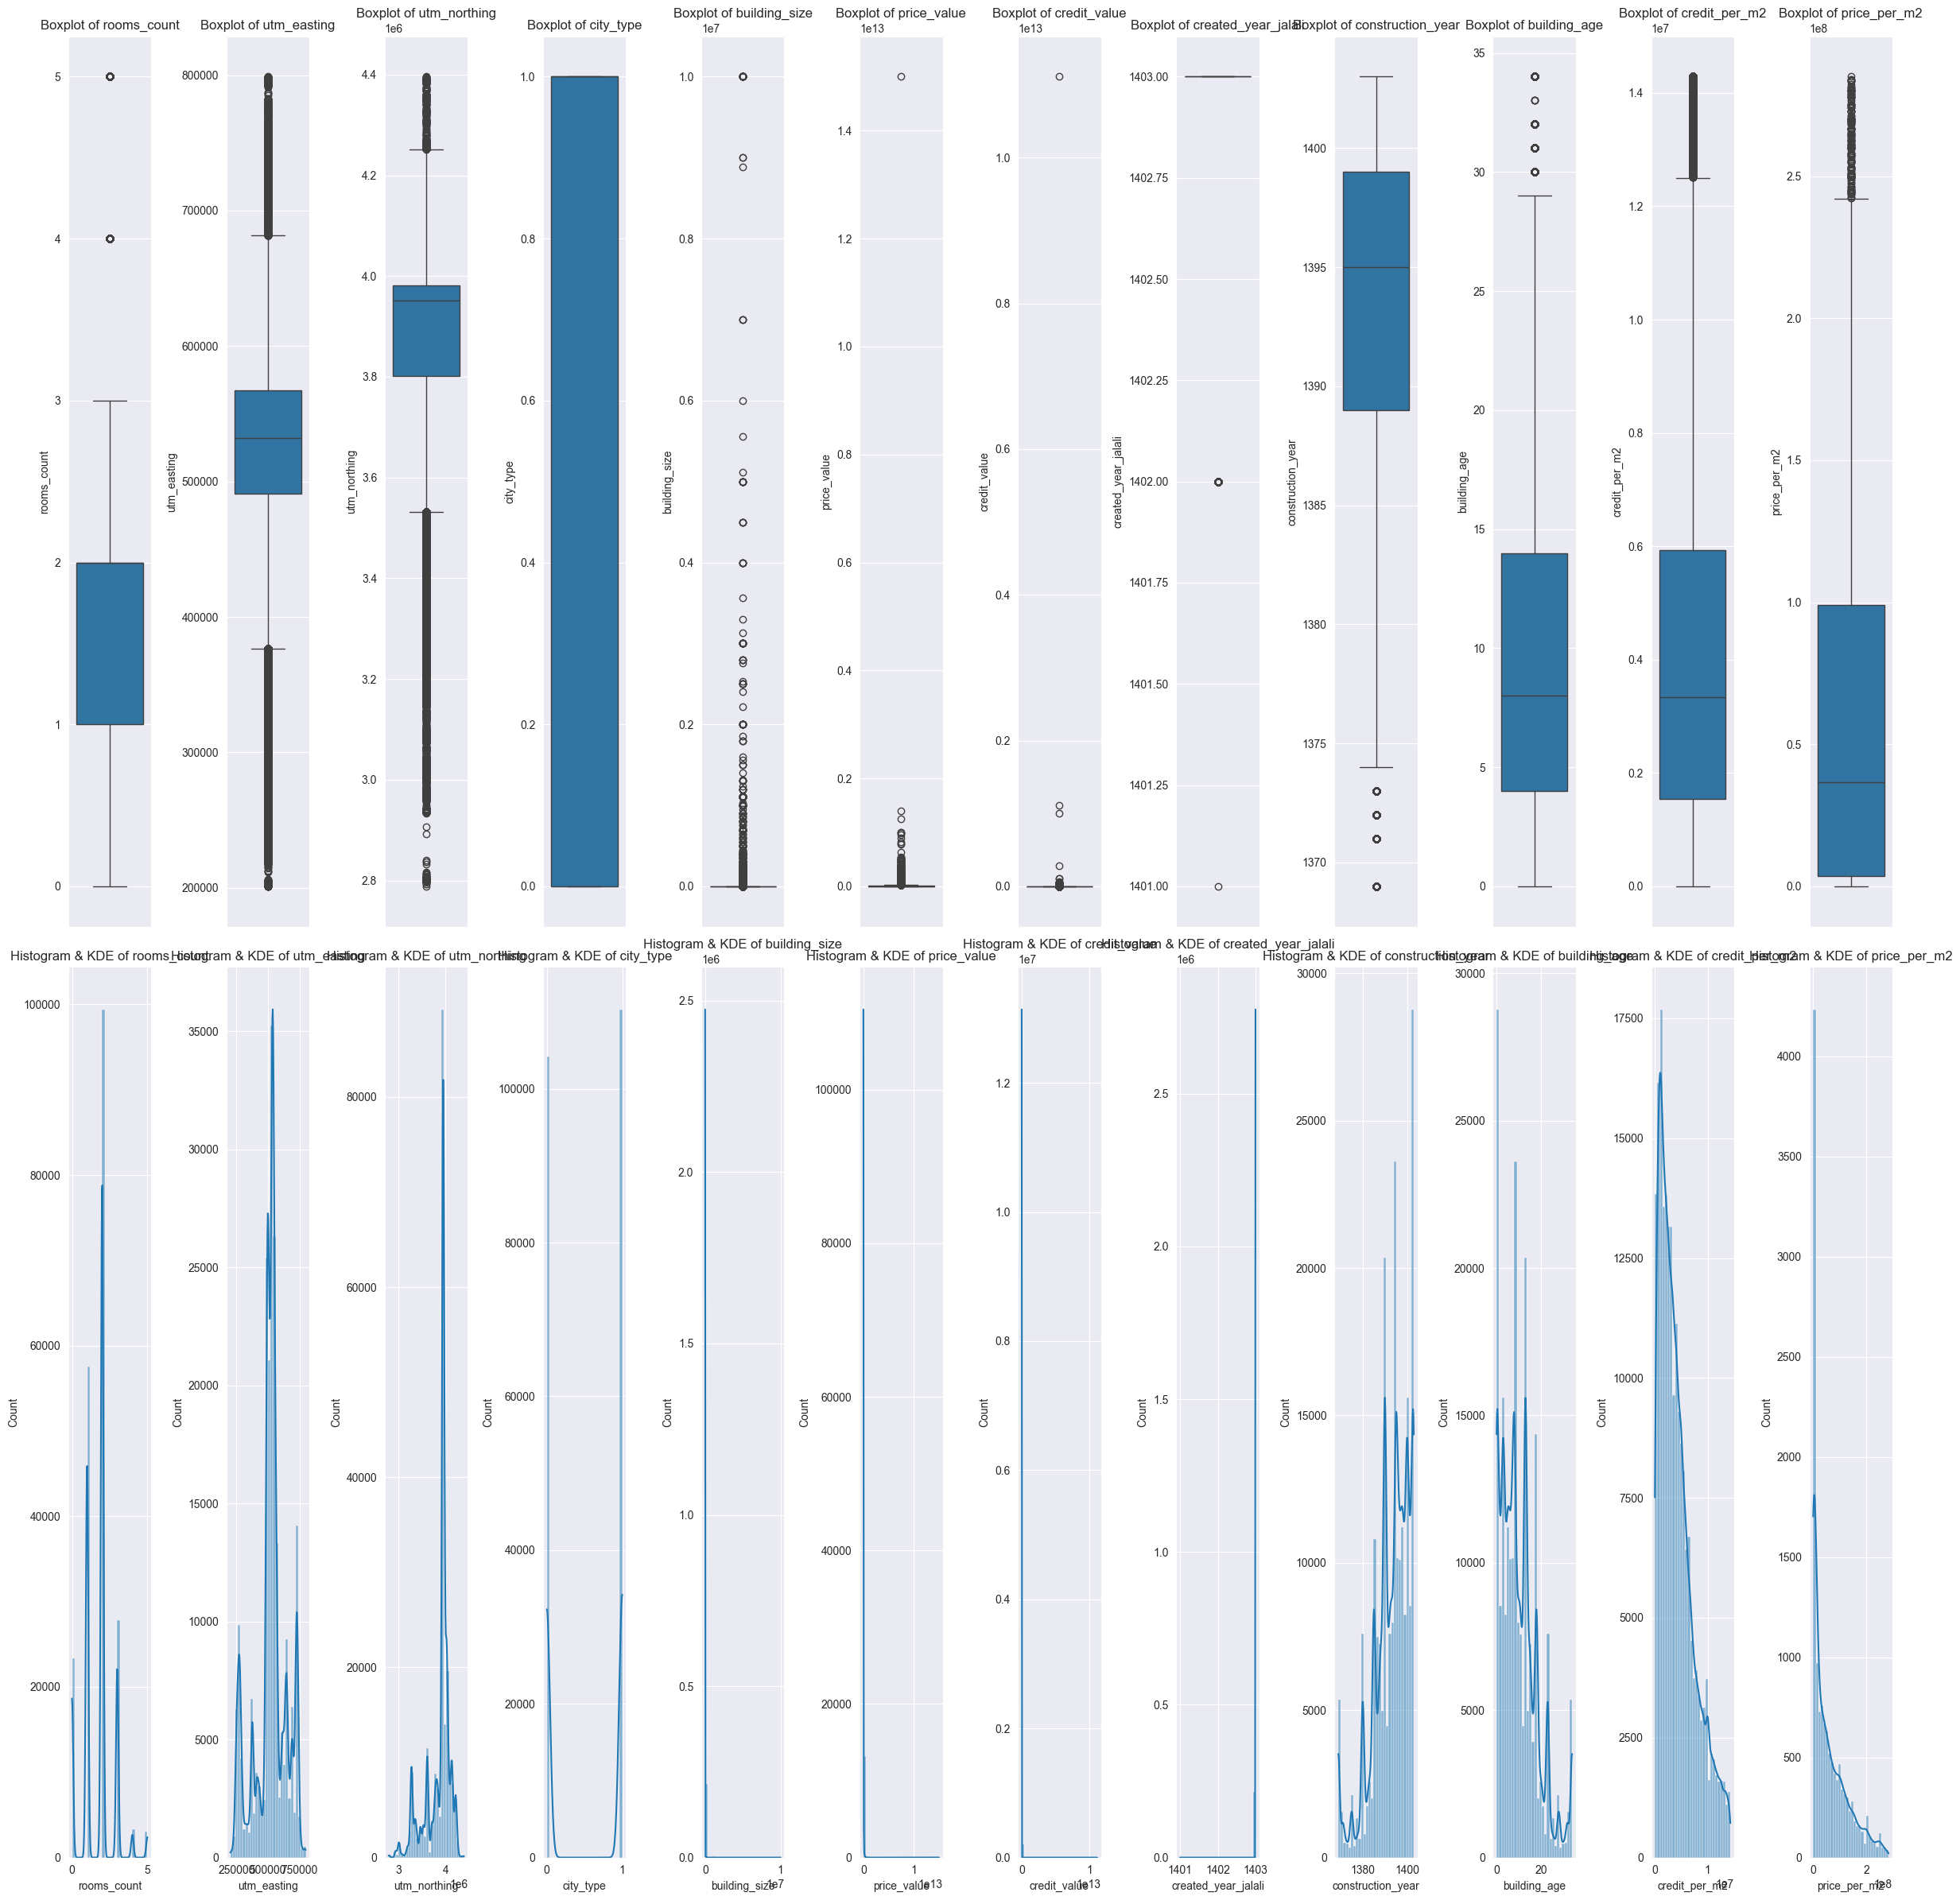

In [67]:
# plt.figure(figsize=(20, 12))
#
# for i, col in enumerate(features, 1):
#     # Boxplot
#     plt.subplot(2, len(features), i)
#     sns.boxplot(y=df[col])
#     plt.title(f'Boxplot of {col}')
#
#     # Histogram + KDE
#     plt.subplot(2, len(features), i + len(features))
#     sns.histplot(df[col], kde=True, bins=30)
#     plt.title(f'Histogram & KDE of {col}')
#
# plt.tight_layout()
# plt.show()

plt.figure(figsize=(24, 24))

num_features = len(features)

for i, col in enumerate(features, 1):
    # بررسی اینکه ستون عددی باشه
    if not pd.api.types.is_numeric_dtype(df[col]):
        print(f"ستون {col} عددی نیست و نادیده گرفته شد.")
        continue

    # Boxplot
    plt.subplot(2, num_features, i)
    sns.boxplot(y=df[col].dropna())
    plt.title(f'Boxplot of {col}')

    # Histogram + KDE
    plt.subplot(2, num_features, i + num_features)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Histogram & KDE of {col}')

plt.tight_layout()
plt.show()